# Problem Statement

 Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features which contain biomedical measurements. Your model will be used to differentiate healthy people from people having disease. Target Column is 'status'. Identify the model with best params. Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data


## Importing basic libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data")

# Exploratory Data analysis

## Understanding dataframe

In [3]:
df.shape

(195, 24)

In [4]:
df.head(5)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df["name"].nunique()

195

-i,e. "name" column in the dataframe is a id(primary key) of each row entry and it doesn't add any extra information about the target column

## Handling Missing Values

### Finding missing values

In [7]:
df.isnull().sum(axis = 0)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df["MDVP:PPQ"][df["MDVP:PPQ"].isnull()]

32   NaN
65   NaN
Name: MDVP:PPQ, dtype: float64

In [9]:
df["Jitter:DDP"][df["Jitter:DDP"].isnull()]

26   NaN
Name: Jitter:DDP, dtype: float64

- Only three missing values in a 195 * 24 grid of data.
- With data samples being limited one can't take the risk of dropping entries with missing data.
- one way to deal with this is to use pd.fillna() method of pandas package to impute mean of the column, but it too can lead to a information loss.
- better option would be to train a simple ML model using other row entries, where values with missing columns would be target column and rest of the columns would be used as features.

### Training model with target column as "MDVP:PPQ" for imputing 2 missing entries

#### splitting data in train and test dataset 

In [10]:
train_impute = df.drop(labels = [32, 65, 26]) #[32, 65, 26] are the ids of the rows with missing data

In [11]:
train_impute.shape

(192, 24)

In [12]:
train_impute.head(2)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  

[2 rows x 24 columns]

In [13]:
test_impute_1 = df.loc[[32, 65], :].copy() ## rows with missing values for column "MDVP:PPQ", the rows we want to impute missing data

In [14]:
test_impute_1

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
32  phon_R01_S07_3      198.383       215.203       193.104         0.00212   
65  phon_R01_S17_6      228.969       239.541       113.201         0.00238   

    MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
32           0.00001   0.00113       NaN     0.00339       0.01263  ...   
65           0.00001   0.00136       NaN     0.00408       0.01745  ...   

    Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
32      0.01919  0.00119  30.775       0  0.465946  0.738703 -7.067931   
65      0.02827  0.00420  24.547       0  0.305429  0.681811 -7.314237   

     spread2        D2       PPE  
32  0.175181  1.512275  0.096320  
65  0.006274  2.118596  0.091546  

[2 rows x 24 columns]

#### Splitting data into target and features

In [15]:
X_train_impute_1 = train_impute.drop(labels = ["MDVP:PPQ", "name"], axis = 1)#"name" column would add no information
Y_train_impute_1 = train_impute["MDVP:PPQ"]
X_test_impute_1 = test_impute_1.drop(labels = ["MDVP:PPQ", "name"], axis = 1)

In [16]:
X_train_impute_1.shape

(192, 22)

In [17]:
Y_train_impute_1.shape

(192,)

In [18]:
X_test_impute_1.shape

(2, 22)

#### Training Linear Regression model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_impute_1 = LinearRegression(fit_intercept = True)

In [21]:
model_impute_1.fit(X_train_impute_1, Y_train_impute_1)

LinearRegression()

In [22]:
model_impute_1.predict(X_test_impute_1)

array([0.00159097, 0.00137845])

In [23]:
X_test_imputed_1 = pd.DataFrame({"MDVP:PPQ" : model_impute_1.predict(X_test_impute_1)}, index = [32, 65])
X_test_imputed_1 

MDVP:PPQ
32  0.001591
65  0.001378

### Training model with target column as "Jitter:DDP" for imputing 1 missing entry

#### splitting data into train and test data

we already have train data in the variable 'train_impute'

In [24]:
train_impute.shape

(192, 24)

In [25]:
test_impute_2 = df.loc[[26], :].copy() ## rows with missing values for column "Jitter:DDP", the rows we want to impute missing data

In [26]:
test_impute_2.shape

(1, 24)

#### splitting data into features and target

In [27]:
X_train_impute_2 = train_impute.drop(labels = ["Jitter:DDP", "name"], axis = 1)#"name" column would add no information
Y_train_impute_2 = train_impute["Jitter:DDP"]
X_test_impute_2 = test_impute_2.drop(labels = ["Jitter:DDP", "name"], axis = 1)

In [28]:
X_train_impute_2.shape

(192, 22)

In [29]:
Y_train_impute_2.shape

(192,)

In [30]:
X_test_impute_2.shape

(1, 22)

#### Training Linear Regression model

In [31]:
model_impute_2 = LinearRegression(fit_intercept = True)

In [32]:
model_impute_2.fit(X_train_impute_2, Y_train_impute_2)

LinearRegression()

In [33]:
model_impute_2.predict(X_test_impute_2)

array([0.00749853])

In [34]:
X_test_imputed_2 = pd.DataFrame({"Jitter:DDP" : model_impute_2.predict(X_test_impute_2)}, index = [26])
X_test_imputed_2 

Jitter:DDP
26    0.007499

### Updating imputed missing values into a dataframe

In [35]:
df["MDVP:PPQ"].loc[32] = X_test_imputed_1.loc[32, "MDVP:PPQ"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
df["MDVP:PPQ"].loc[32]

0.0015909719115946952

In [37]:
df["MDVP:PPQ"].loc[65] = X_test_imputed_1.loc[65, "MDVP:PPQ"]

In [38]:
df["MDVP:PPQ"].loc[65]

0.0013784472391884547

In [39]:
df["Jitter:DDP"].loc[26] = X_test_imputed_2.loc[26, "Jitter:DDP"]

In [40]:
df["Jitter:DDP"].loc[26]

0.007498531243294212

In [41]:
df.isnull().sum(axis = 0)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Dropping column "name" as it serves no purpose other than primary key, and we can use implicit pandas keys for our operations

In [42]:
df = df.drop(labels = "name", axis = 1)
df.head(1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  

[1 rows x 23 columns]

## Splitting Dataframe into features and target

In [43]:
df_X = df.drop(labels = "status", axis = 1)
df_X.shape

(195, 22)

In [44]:
df_Y = df["status"]
df_Y.shape

(195,)

In [45]:
df_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

# Visualization

## Univariate

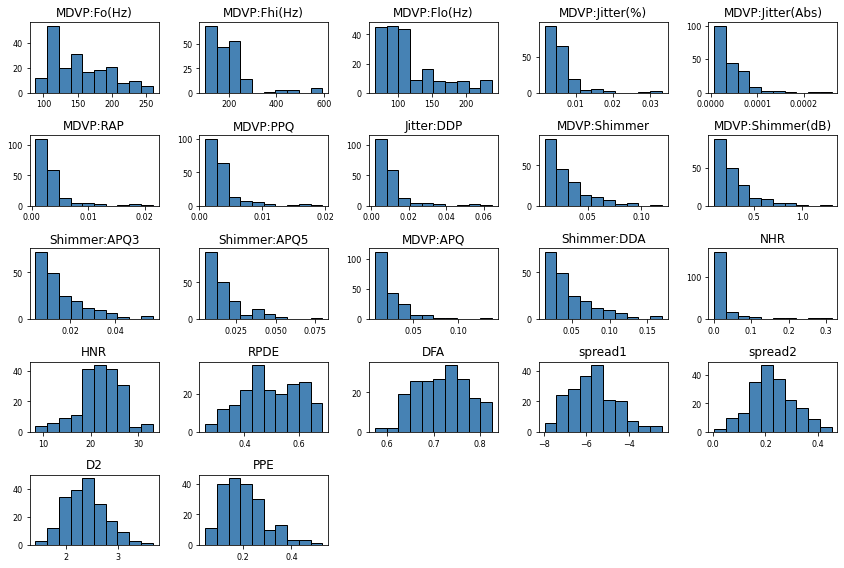

In [46]:
data = df_X #a dataframe 

data.hist(color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2)) 

## Bivariate (features with Target)

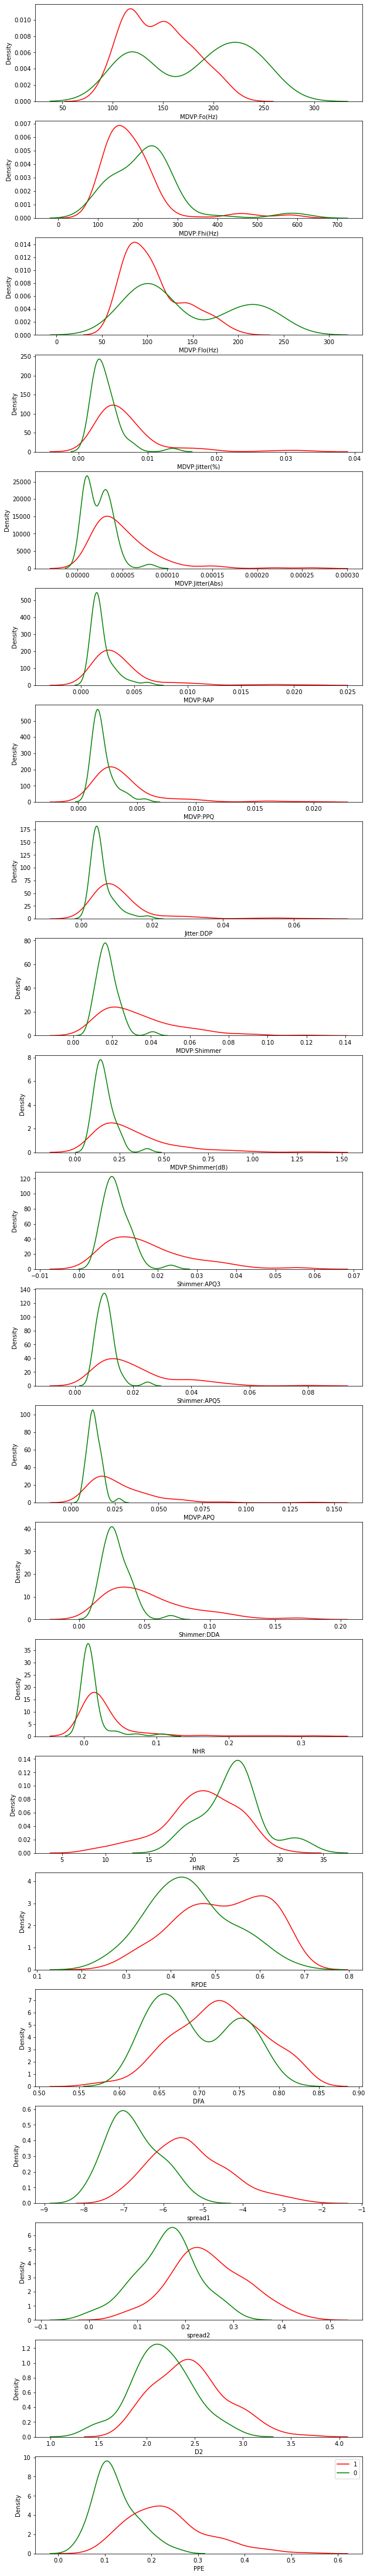

In [47]:
fig, ax = plt.subplots(len(df_X.columns), figsize = (10, 80))
for i in range(len(df_X.columns)):
    sns.kdeplot(df_X.iloc[:, i][df_Y == 1], ax = ax[i], label = "1", color = "Red")
    sns.kdeplot(df_X.iloc[:, i][df_Y == 0], ax = ax[i], label = "0", color = "Green")
    ax[i].set_xlabel(df_X.columns[i])
plt.legend()
    

## Heatmap of correlation matrix

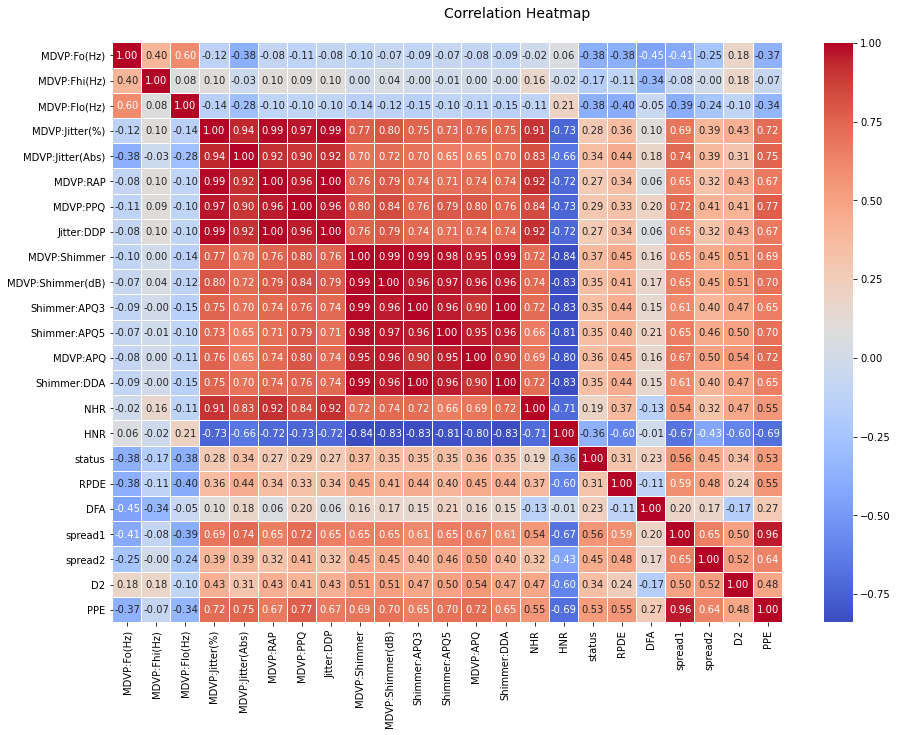

In [48]:
temp_df = df

#plot details
title_string = 'Correlation Heatmap'
title_font = 14

f, ax = plt.subplots(figsize=(15, 10))
corr = temp_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle(title_string, fontsize = title_font)

- features ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'] and ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA'] are very highly correlated amongst each other. We'll deal with them in coming section.
- Tree based algorithms are immune to this multi-collinearity but algorithms like logistic regression are vastly affected by it.

## Pairplot

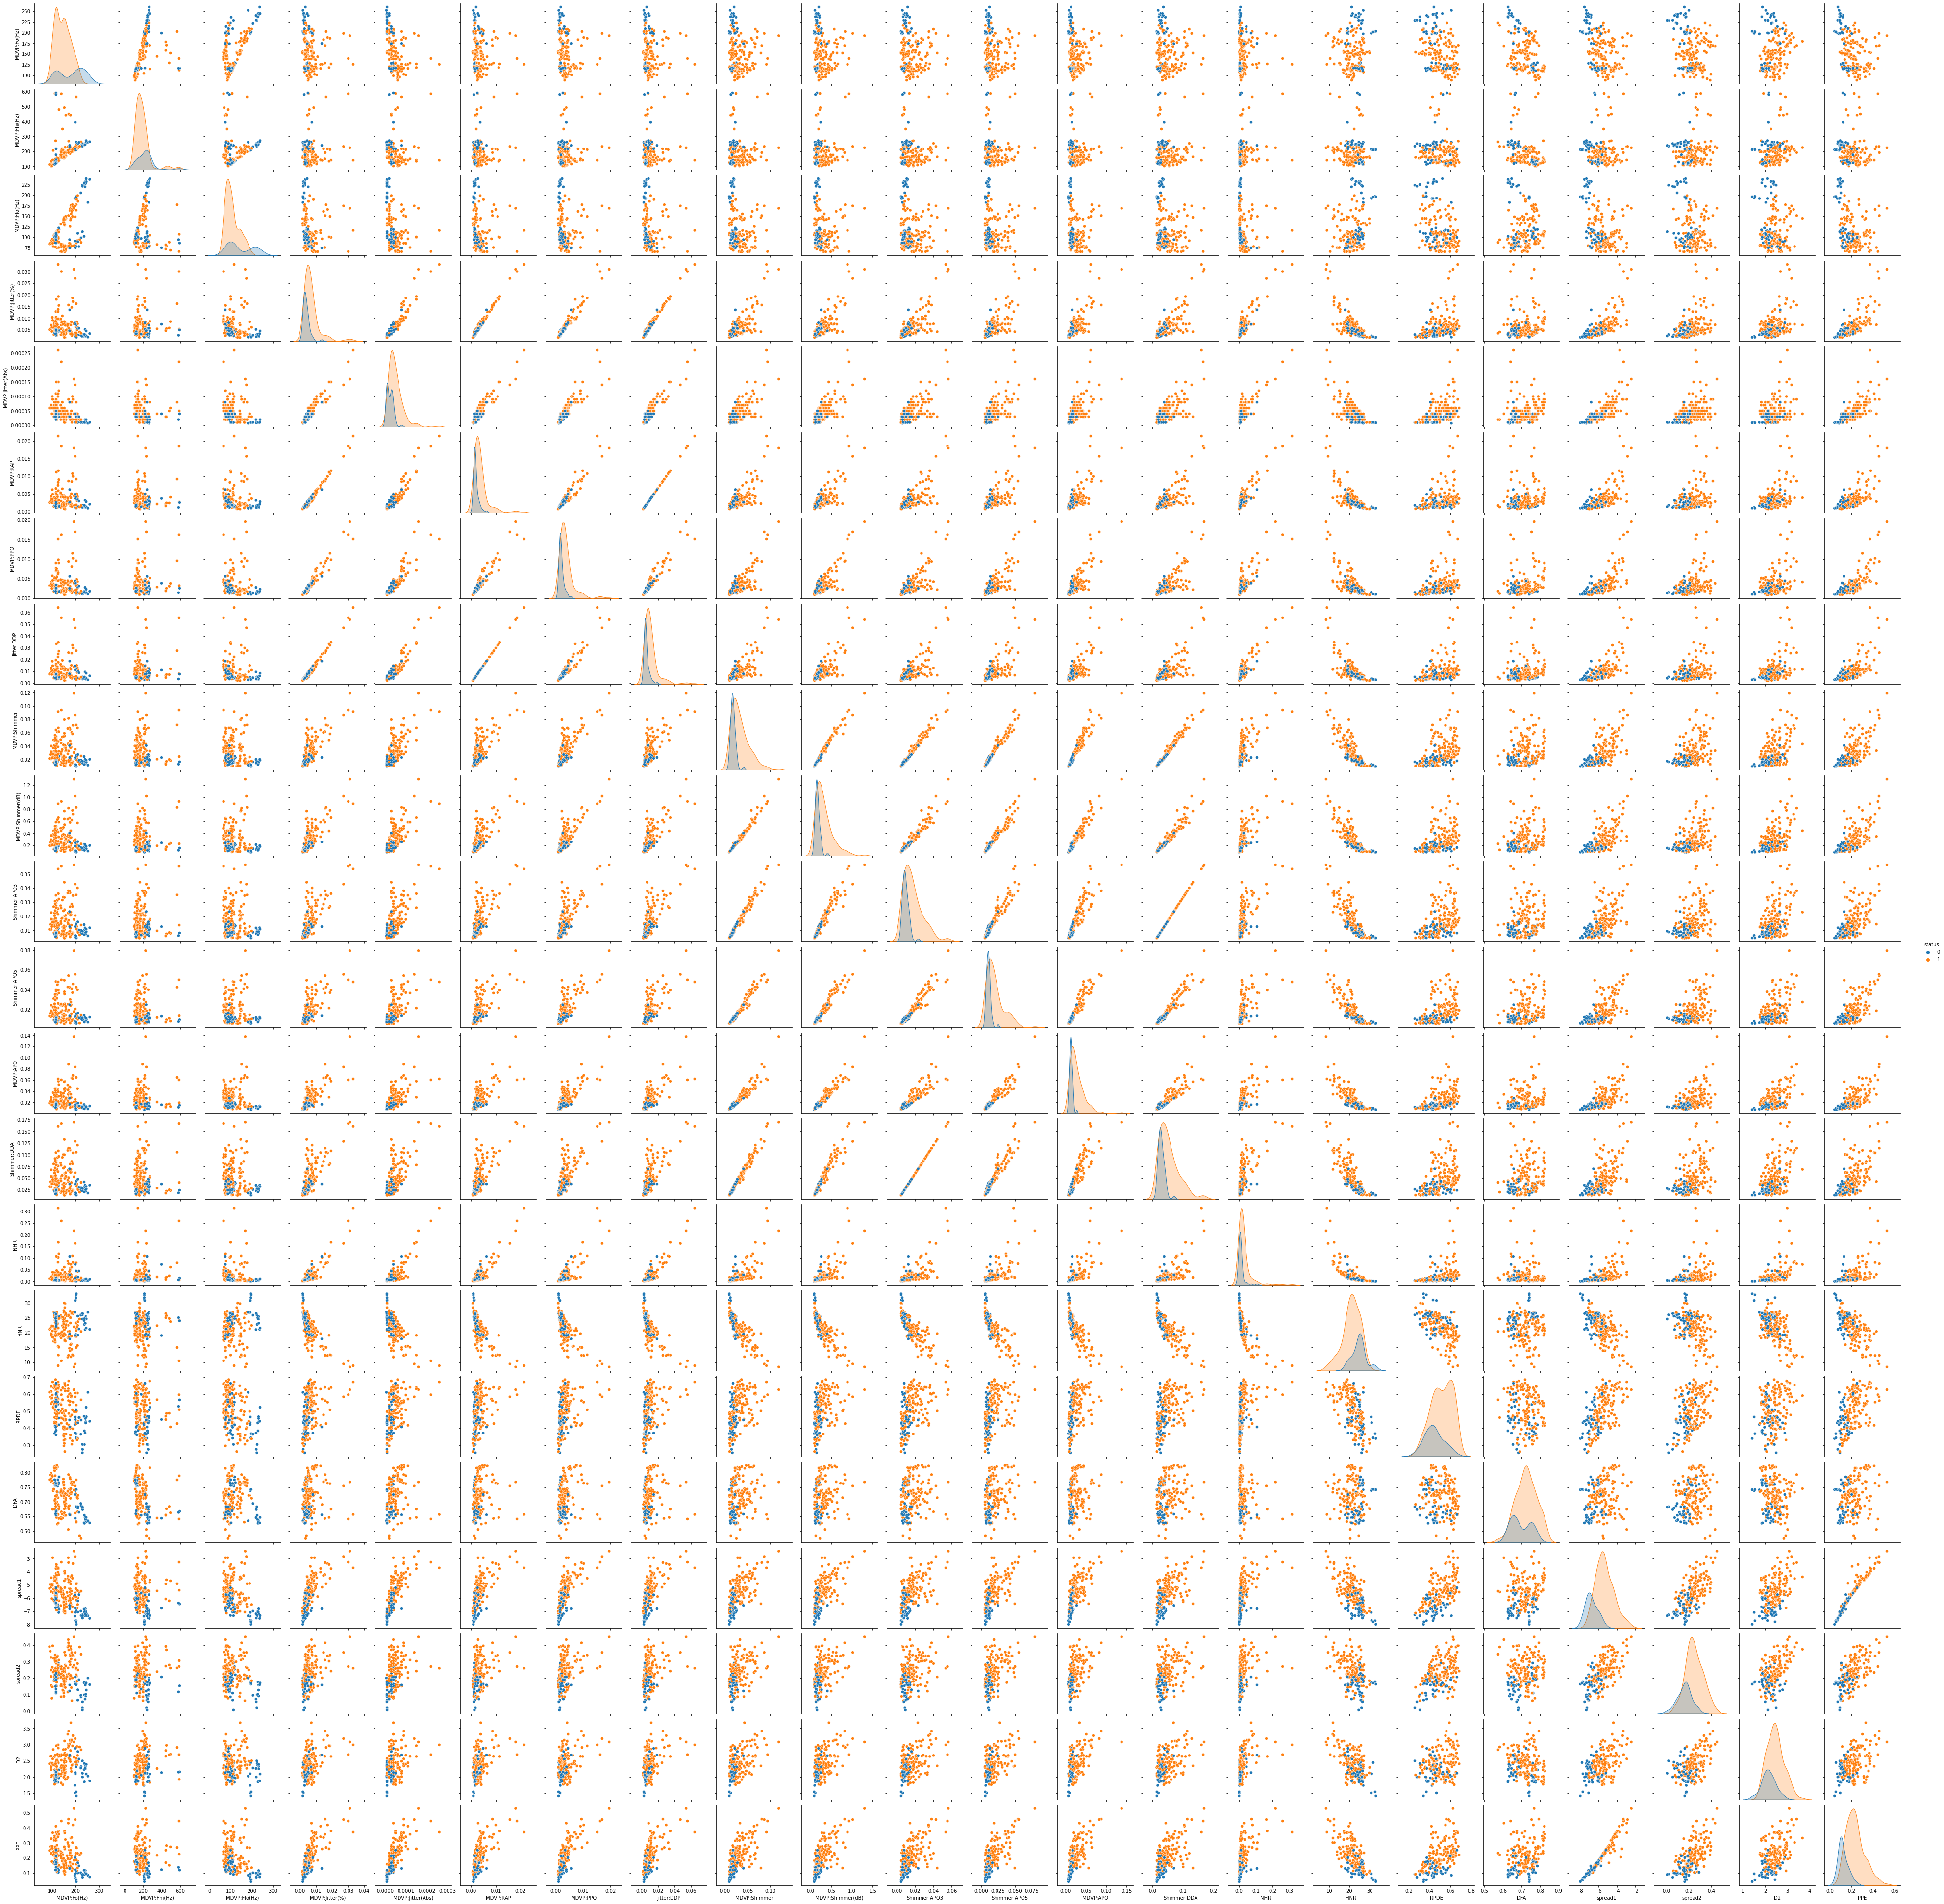

In [49]:
sns.pairplot(df, hue = "status")

- Zoom in the above diagram
- The observation about some features being very correlated among each other can be seen here as well
- There is no single variable or pair of variables which can clearlys seperate status "0" from "1", at the same time it is clearly visible that there are certain difference among two classes over all the variables.

# Feature Engineering

- As we have seen earlier their is high degree of multi-colinearity among some group of features like  ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'] and ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA']
- One way to deal with them is to randomly choose only one among any of the group, but it has the chance of losing information
- Another way is to take a product of all the features in a multi-collinear group, which infact captures the effect of all features in a group. But there too is the chance of losing information
- ideal way is to apply PCA for each group. (PCA is dimensionality reduction technique to insure minumum loss, which works supremly well for multi-collinear data). 
- PCA follows law of diminishing return, i,e. As you increase the output dimensions the information gain reduces with each extra added dimension. With Highly colliear data information from 4-5 features can be reduced to one or two features with very little loss.
- So applying PCA for two multi-collinear groups discussed earlier

In [50]:
from sklearn.decomposition import PCA

## Applying PCA to the group ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']

In [51]:
temp_df = df_X[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']]
temp_df.head(1)

MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP
0         0.00784           0.00007    0.0037   0.00554     0.01109

In [52]:
for i in range(1, 6):
    temp_pca_model = PCA(n_components = i)
    temp_pca_model.fit(temp_df)
    print("Explained Variance using {0} components = {1}%".format(i, round(sum(temp_pca_model.explained_variance_ratio_) * 100, 2)))

Explained Variance using 1 components = 99.25%
Explained Variance using 2 components = 99.85%
Explained Variance using 3 components = 100.0%
Explained Variance using 4 components = 100.0%
Explained Variance using 5 components = 100.0%


- It is clear from the above demonstration that even one component describes 99.25% of total variance, hence using one component for this group

In [53]:
pca_model_1 = PCA(n_components = 1)
df_X["Jitter:PCA_1"] = pca_model_1.fit_transform(temp_df)
df_X["Jitter:PCA_1"].head(5)

0    0.002296
1    0.006050
2    0.008792
3    0.007192
4    0.013167
Name: Jitter:PCA_1, dtype: float64

## Applying PCA to the group ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA']

In [54]:
temp_df = df_X[['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA']]
temp_df.head(2)

MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
0       0.04374             0.426       0.02182       0.03130   0.02971   
1       0.06134             0.626       0.03134       0.04518   0.04368   

   Shimmer:DDA  
0      0.06545  
1      0.09403

In [55]:
for i in range(1, 7):
    temp_pca_model = PCA(n_components = i)
    temp_pca_model.fit(temp_df)
    print("Explained Variance using {0} components = {1}%".format(i, round(sum(temp_pca_model.explained_variance_ratio_) * 100, 2)))

Explained Variance using 1 components = 99.72%
Explained Variance using 2 components = 99.93%
Explained Variance using 3 components = 99.99%
Explained Variance using 4 components = 100.0%
Explained Variance using 5 components = 100.0%
Explained Variance using 6 components = 100.0%


 - It is clear from the above demonstration that even one component describes 99.72% of total variance, hence using one component for this group

In [56]:
pca_model_1 = PCA(n_components = 1)
df_X["Shimmer:PCA_1"] = pca_model_1.fit_transform(temp_df)
df_X["Shimmer:PCA_1"].head(5)

0    0.146206
1    0.350141
2    0.205553
3    0.241090
4    0.311338
Name: Shimmer:PCA_1, dtype: float64

## Dropping old features and checking heatmap of correlation matrix again

In [57]:
df_X = df_X.drop(labels = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'], axis = 1)
df_X.shape

(195, 13)

In [58]:
df["Shimmer:PCA_1"] = df_X["Shimmer:PCA_1"]
df["Jitter:PCA_1"] = df_X["Jitter:PCA_1"]
df = df.drop(labels = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'], axis = 1)

In [59]:
df.shape

(195, 14)

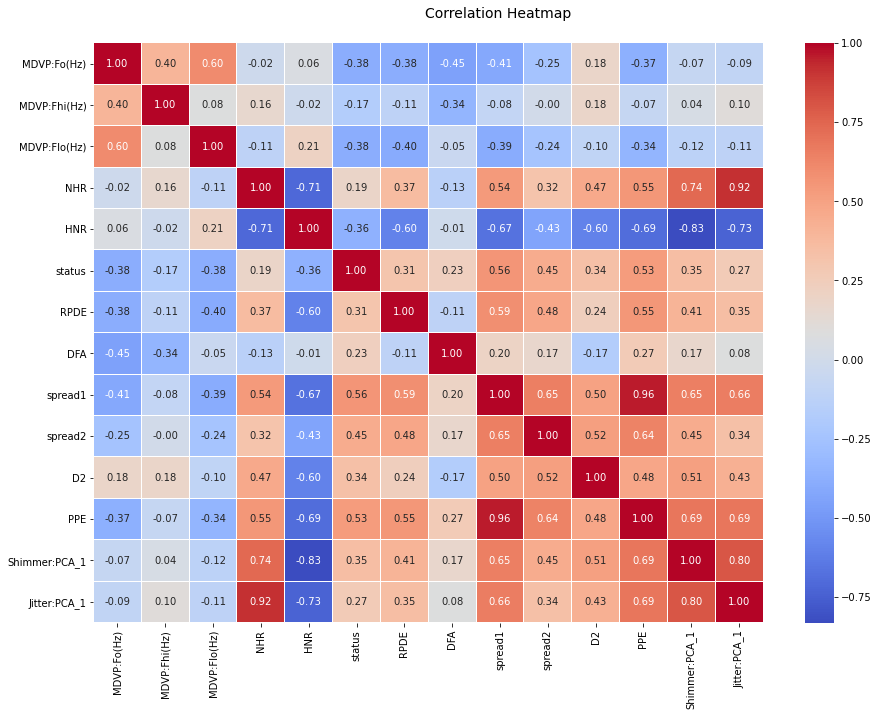

In [60]:
temp_df = df

#plot details
title_string = 'Correlation Heatmap'
title_font = 14

f, ax = plt.subplots(figsize=(15, 10))
corr = temp_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle(title_string, fontsize = title_font)

- multi-collinearity is very little in new feature matrix
- still there exist some features which are highly correlated with each other
- hence keeping one of the two correlated features
- eg. keeping only spread1 feature and dropping PPE(pearson's R = 0.96)

In [72]:
df_X = df_X.drop(labels = "PPE", axis = 1)
df = df.drop(labels = "PPE", axis = 1)

# Data Meets Model

## Splitting data into train and test

In [76]:
from sklearn.model_selection import train_test_split

In [79]:
df_Y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.15, random_state=8)

In [93]:
y_train.value_counts()

1    124
0     41
Name: status, dtype: int64

In [94]:
y_test.value_counts()

1    23
0     7
Name: status, dtype: int64

## Naive-Bayes

- Expect this model to perform poorly as it has a fundamental assumption that all the variables must be independent of each other
- It has no hyperparameter to tune

### Fitting model to the data

In [95]:
from sklearn.naive_bayes import GaussianNB

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [175]:
def classification_metrics(y_true, y_pred):
    print("Accuracy: ", round(accuracy_score(y_true, y_pred), 2), "\n")
    print("Confusion Matrix\n\n", confusion_matrix(y_true, y_pred), "\n")
    print("Classification_report\n", classification_report(y_true, y_pred))

In [100]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y = gnb_model.predict(X_test)

In [176]:
classification_metrics(y_test, gnb_y)

Accuracy:  0.73 

Confusion Matrix

 [[ 5  2]
 [ 6 17]] 

Classification_report
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.89      0.74      0.81        23

    accuracy                           0.73        30
   macro avg       0.67      0.73      0.68        30
weighted avg       0.79      0.73      0.75        30



### Checking performace on train data as well

In [125]:
gnb_y_train = gnb_model.predict(X_train)

In [177]:
classification_metrics(y_train, gnb_y_train)

Accuracy:  0.79 

Confusion Matrix

 [[33  8]
 [27 97]] 

Classification_report
               precision    recall  f1-score   support

           0       0.55      0.80      0.65        41
           1       0.92      0.78      0.85       124

    accuracy                           0.79       165
   macro avg       0.74      0.79      0.75       165
weighted avg       0.83      0.79      0.80       165



- As expected it's not a very good model to predict as it's basic assumptions were not satisfied.
- very bad performance with class "0"
- Although it gave us a good baseline for further models

## Logistic Regression

- It's a very strong model for binary classification with very few assumptions
- I expect it to perform well, it it doesn't we would have to move to tree based models

### Fitting model to the data

In [111]:
from sklearn.linear_model import LogisticRegression

In [160]:
LogisticRegression?

In [163]:
lr_model = LogisticRegression(fit_intercept = True, solver = "newton-cg")

In [164]:
lr_model.fit(X_train, y_train)
lr_y = lr_model.predict(X_test)

In [178]:
classification_metrics(y_test, lr_y)

Accuracy:  0.83 

Confusion Matrix

 [[ 3  4]
 [ 1 22]] 

Classification_report
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.85      0.96      0.90        23

    accuracy                           0.83        30
   macro avg       0.80      0.69      0.72        30
weighted avg       0.82      0.83      0.82        30



### assessing performance of model on train data

In [168]:
lr_y_train = lr_model.predict(X_train)

In [179]:
classification_metrics(y_train, lr_y_train)

Accuracy:  0.87 

Confusion Matrix

 [[ 25  16]
 [  6 118]] 

Classification_report
               precision    recall  f1-score   support

           0       0.81      0.61      0.69        41
           1       0.88      0.95      0.91       124

    accuracy                           0.87       165
   macro avg       0.84      0.78      0.80       165
weighted avg       0.86      0.87      0.86       165



- Much better performance with logistic regression but yet very bad performance with class "0" as recall is 0.61 for train and 0.43 for test
- one probable reason could be the ver little data available for class "0"
- we can use ridge and lasso regreesion classifier but there are no signs of overfitting(train and test scores are very similar) and those methods are great for adding bias to the data to reduce variance

## Decision Tree

### Fitting model to the data

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dt_model = DecisionTreeClassifier(criterion = "entropy")

In [173]:
dt_model.fit(X_train, y_train)
dt_y = dt_model.predict(X_test)

In [180]:
classification_metrics(y_test, dt_y)

Accuracy:  0.83 

Confusion Matrix

 [[ 4  3]
 [ 2 21]] 

Classification_report
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.88      0.91      0.89        23

    accuracy                           0.83        30
   macro avg       0.77      0.74      0.75        30
weighted avg       0.83      0.83      0.83        30



### Assessing performance on the train data

In [181]:
dt_y_train = dt_model.predict(X_train)

In [182]:
classification_metrics(y_train, dt_y_train) 

Accuracy:  1.0 

Confusion Matrix

 [[ 41   0]
 [  0 124]] 

Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       124

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



- above model is obviosly overfitted (high train accuracy)
- to solve these we need to add bias(through various tunable hyperparameters of decision tree classifier)

### Hyperparameter tuning

- we are going to tune 4 hyperparameters of criterion, max_depth, min_samples_split and min_samples_leaf

In [186]:
from sklearn.model_selection import GridSearchCV

In [190]:
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [i for i in range(2, 21)],
    "min_samples_split" : [i for i in range(2, 7)],
    "min_samples_leaf" : [i for i in range(1, 7)]
}

In [210]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, n_jobs = 2, cv = 10, verbose = 1)

In [211]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1140 candidates, totalling 11400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

#### Best Parameters

In [212]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

#### Test Score

In [213]:
gs_dt_y = grid_search.predict(X_test)
classification_metrics(y_test, gs_dt_y)

Accuracy:  0.93 

Confusion Matrix

 [[ 6  1]
 [ 1 22]] 

Classification_report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.96      0.96      0.96        23

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



#### Train Score

In [214]:
gs_dt_y_train = grid_search.predict(X_train)
classification_metrics(y_train, gs_dt_y_train)

Accuracy:  0.97 

Confusion Matrix

 [[ 37   4]
 [  1 123]] 

Classification_report
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.97      0.99      0.98       124

    accuracy                           0.97       165
   macro avg       0.97      0.95      0.96       165
weighted avg       0.97      0.97      0.97       165



#### Final Tree

In [219]:
from sklearn.tree import export_graphviz
dt_best = DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_leaf = 1, min_samples_split = 4)
dt_best.fit(X_train, y_train)
export_graphviz(dt_best, "DT.dot", feature_names = X_train.columns, impurity = False, filled = True)

In [220]:
import graphviz

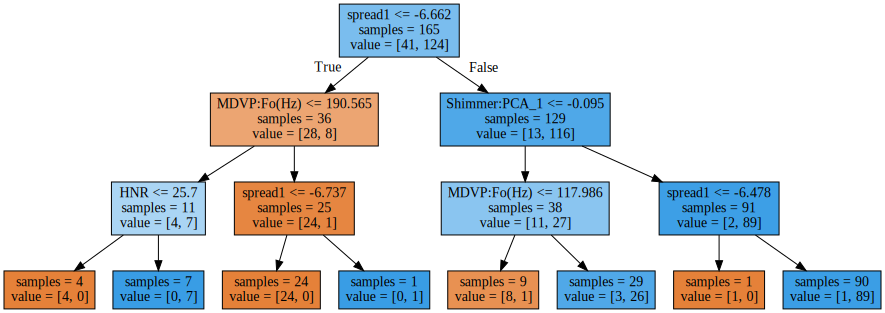

In [221]:
with open("DT.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- as you can see we have found a sweatspot between bias and variance(overfittin and underfitting)
- also recall for class "0" have increased drastically i,e performance for class "0" has increased